In [1]:
from main.main import MDP, sarsa, on_policy_first_visit_mc_control, value_iteration, plot_policy
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
random.seed(42)

In [3]:
mdp = MDP()

### 1. Implement Q learning and SARSA and evaluate the performance on this domain

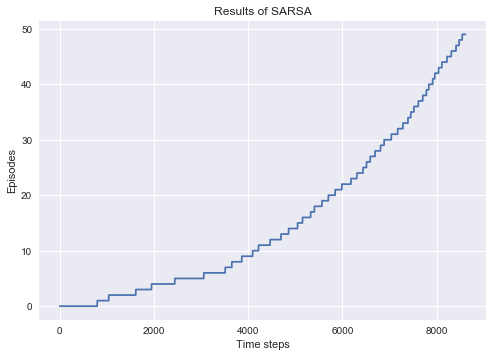

In [4]:
def plot_sarsa():
    policy, timestampes, nepisodes = sarsa(mdp, n_episodes=50, alpha=0.5, gamma=0.5)

    sns.set_style("darkgrid")
    plt.plot(timestampes, nepisodes)
    plt.xlabel('Time steps')
    plt.ylabel('Episodes')
    plt.title('Results of SARSA')
    plt.show()
    
plot_sarsa()

### 2. Evaluate your MC and DP implementations from HW 2 and 3 on this domain. 

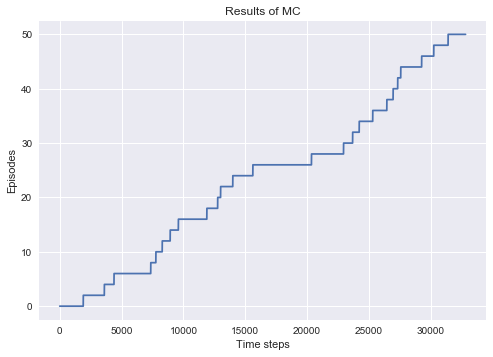

In [4]:
def plot_mc():
    policy, timestampes, nepisodes = on_policy_first_visit_mc_control(mdp, eps=1, n_episodes=50)
    sns.set_style("darkgrid")
    plt.plot(timestampes, nepisodes)
    plt.xlabel('Time steps')
    plt.ylabel('Episodes')
    plt.title('Results of MC')
    plt.show()

plot_mc()

In [5]:
policy_vals = value_iteration(mdp, gamma=0.8, theta=0.001)
policy_with = {(state.x, state.y): policy_vals[state] for state in policy_vals if state.cows_vec[0]}

policy_without = {(state.x, state.y): policy_vals[state] for state in policy_vals if not state.cows_vec[0]}
policy_without[mdp.cow_positions[0]] = 0

Number of iterations 28


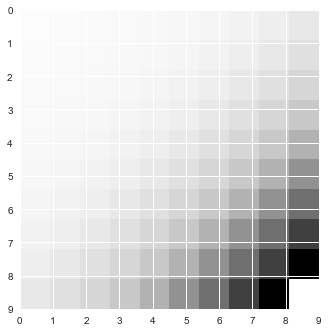

In [6]:
plot_policy(policy_without)

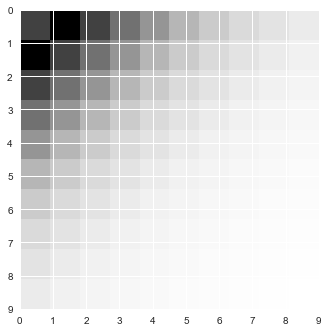

In [7]:
plot_policy(policy_with)

### 3. What happens when you increase the number of cows placed in the grid environment, and why? Assume that the lion will have to bring all cows to his starting position before he can eat them. Also assume that the lion is strong enough to carry around an unlimited amount of cows.

In [9]:
mdp2 = MDP(cow_positions=[(9,9), (0,9)])

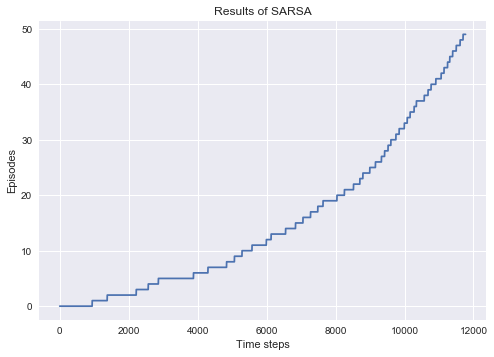

In [10]:
policy, timestampes, nepisodes = sarsa(mdp2, n_episodes=50, alpha=0.5, gamma=0.5)

sns.set_style("darkgrid")
plt.plot(timestampes, nepisodes)
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.title('Results of SARSA')
plt.show()


In [32]:
policy_vals = value_iteration(mdp2, gamma=0.9, theta=0.0001)
policy_with = {(state.x, state.y): policy_vals[state] for state in policy_vals if state.cows_vec == (True, True)}
for pos in mdp2.cow_positions:
    policy_with[pos] = 0
    
policy_without = {(state.x, state.y): policy_vals[state] for state in policy_vals if state.cows_vec == (False, False)}
for pos in mdp2.cow_positions:
    policy_without[pos] = 0

Number of iterations 68


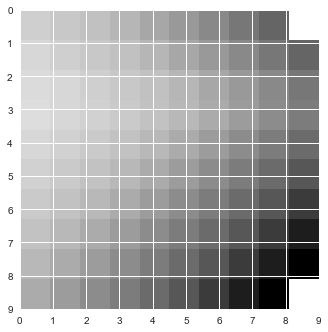

In [33]:
plot_policy(policy_without)

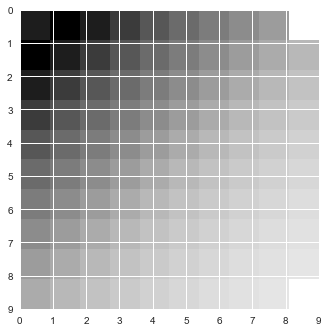

In [34]:
plot_policy(policy_with)